In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt


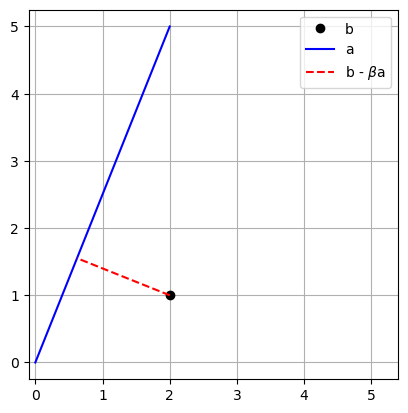

In [2]:
b=np.array([2,1])
a=np.array([2,5])
beta=(a.T@b)/(a.T@a)
plt.plot(b[0], b[1], 'ko', label='b')
plt.plot([0, a[0]], [0, a[1]], 'b', label='a')

plt.plot([b[0], beta*a[0]], [b[1], beta*a[1]], 'r--', label=r'b - $\beta$a')
plt.axis('square')
plt.grid()
plt.legend()

In [3]:
beta

0.3103448275862069

In [4]:
a.T@b

9

In [5]:
a.T@a

29

In [6]:
b[1]

1

In [7]:
beta*a[1]

1.5517241379310345

In [8]:
m=16
n=10
b=np.random.randn(m,1)
A=np.random.randn(m,n)

x1=np.linalg.inv(A.T@A)@(A.T@b)
x2=np.linalg.solve(A.T@A, A.T@b)
print(np.round(x1.T,4))
print(np.round(x2.T,4))
    

[[ 0.0622  0.4663 -0.2444  0.1477 -0.2966  0.8396 -0.7796 -0.3003 -0.1206
   0.6477]]
[[ 0.0622  0.4663 -0.2444  0.1477 -0.2966  0.8396 -0.7796 -0.3003 -0.1206
   0.6477]]


In [9]:
m=3
n=2
b=np.random.randn(m,1)
A=np.random.randn(m,n)
x=np.linalg.solve(A.T@A, A.T@b)
Ax=A@x
print(b.T)
print(Ax.T)
b[0]

[[-0.74224456 -1.07793238 -0.1935096 ]]
[[-0.70766379 -1.10543575 -0.03818991]]


array([-0.74224456])

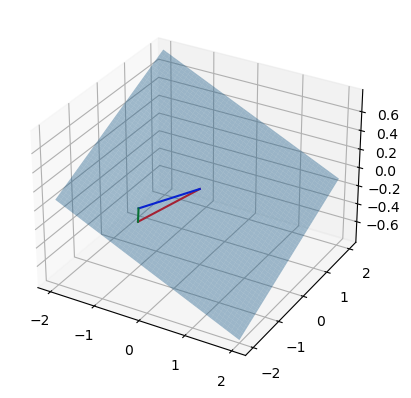

In [10]:
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.plot([0, b[0][0]], [0, b[1][0]], [0, b[2][0]], 'r')
ax.plot([0, Ax[0][0]], [0, Ax[1][0]], [0, Ax[2][0]], 'b')
ax.plot([Ax[0][0], b[0][0]],  [Ax[1][0], b[1][0]], [Ax[2][0], b[2][0]], 'g')
xx,yy=np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
cp=np.cross(A[:, 0], A[:, 1])
z1=(-cp[0]*xx-cp[1]*yy)/cp[2]
ax.plot_surface(xx, yy, z1, alpha=.4)

In [11]:
w=np.array([5,6])
v=np.array([2,7])
beta=np.dot(w,v)/np.dot(v,v)
w_par_v=beta*v
w_perp_v=w-w_par_v
print((w_par_v + w_perp_v) - w)
print(np.dot(w_par_v, w_perp_v))

[0. 0.]
-1.7763568394002505e-15


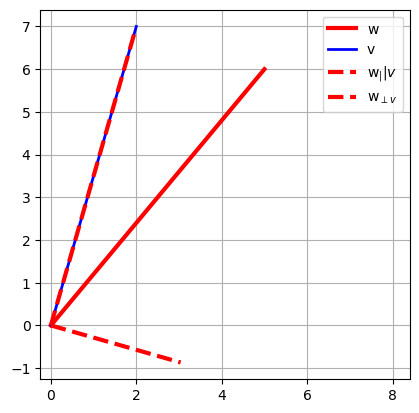

In [12]:
plt.plot([0, w[0]], [0, w[1]], 'r', linewidth=3)
plt.plot([0, v[0]], [0, v[1]], 'b', linewidth=2)
plt.plot([0, w_par_v[0]], [0, w_par_v[1]], 'r--', linewidth=3)
plt.plot([0, w_perp_v[0]], [0, w_perp_v[1]], 'r--', linewidth=3)
plt.legend(['w', 'v', 'w${_| |v}$', 'w$_{\perp v}$'])
plt.axis('square')
plt.grid()


In [13]:
A=np.array([[1,0], [1,0], [0, 1]])
Q,R=np.linalg.qr(A, 'complete')
print(Q)

[[-0.70710678  0.          0.70710678]
 [-0.70710678  0.         -0.70710678]
 [-0.         -1.          0.        ]]


In [14]:
A=np.array([[1,0], [1,0], [0, 1]])
Q,R=np.linalg.qr(A)
print(Q)

[[-0.70710678  0.        ]
 [-0.70710678  0.        ]
 [-0.         -1.        ]]


In [15]:
M=np.array([[1,1,-2], [3,-1,1]])
Q,R=np.linalg.qr(M, 'complete')
print('R from QR: ', np.round(R, 4))
print('R from Q^TA: ', np.round(Q.T@M, 4))

R from QR:  [[-3.1623  0.6325 -0.3162]
 [ 0.     -1.2649  2.2136]]
R from Q^TA:  [[-3.1623  0.6325 -0.3162]
 [ 0.     -1.2649  2.2136]]


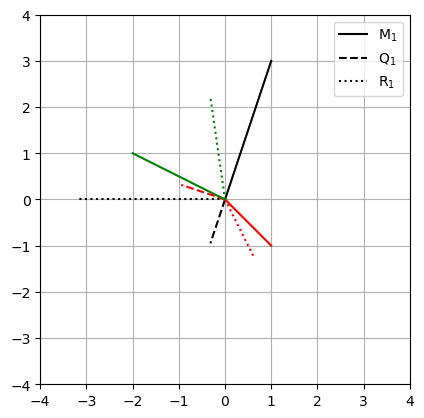

In [16]:
colorz='krg'
for i in range(np.shape(M)[1]):
    plt.plot([0, M[0,i]], [0, M[1,i]], colorz[i])
    
    if i<np.shape(Q)[1]:
        plt.plot([0, Q[0,i]], [0, Q[1,i]], colorz[i], linestyle='--')
      
    plt.plot([0, R[0,i]], [0, R[1,i]], colorz[i], linestyle=':')

plt.legend(['M$_1$', 'Q$_1$', 'R$_1$'])
plt.axis('square')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.grid()


In [17]:
m=4
n=4
A=np.random.randn(m,n)
Q=np.zeros((m,n))
for i in range(n):
    Q[:, i]=A[:, i]
    a=A[:, i]
    for j in range(i):
        q=Q[:, j]
        Q[:, i]=Q[:, i] - np.dot(a,q)/np.dot(q,q)*q
        
    Q[:,i]=Q[:, i]/np.linalg.norm(Q[:, i])

    

In [18]:
Q

array([[-0.65712895, -0.15627938,  0.69973292,  0.23266316],
       [-0.46907862, -0.47054825, -0.32123818, -0.67480043],
       [-0.58755857,  0.60753357, -0.48833805,  0.21726443],
       [ 0.05405289,  0.6205353 ,  0.41073815, -0.66581409]])

In [19]:
np.linalg.qr(A)

(array([[-0.65712895, -0.15627938,  0.69973292, -0.23266316],
        [-0.46907862, -0.47054825, -0.32123818,  0.67480043],
        [-0.58755857,  0.60753357, -0.48833805, -0.21726443],
        [ 0.05405289,  0.6205353 ,  0.41073815,  0.66581409]]),
 array([[ 1.18150422,  1.29503895,  0.58409751,  2.70522226],
        [ 0.        ,  3.11864824, -0.28215571, -0.39316631],
        [ 0.        ,  0.        ,  0.37602921,  1.98214118],
        [ 0.        ,  0.        ,  0.        , -1.30792302]]))

[[ 1. -0. -0. -0.]
 [-0.  1.  0.  0.]
 [-0.  0.  1.  0.]
 [-0.  0.  0.  1.]]


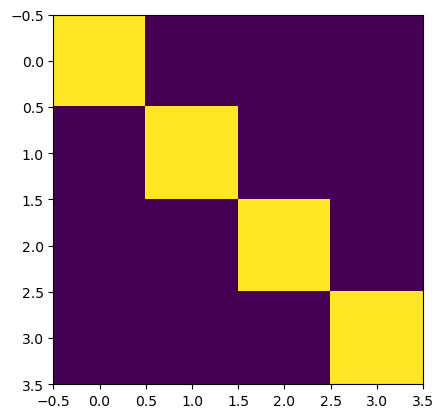

In [20]:
print(np.round(Q.T@Q, 3))
plt.imshow(Q.T@Q)


In [21]:
Q2,R=np.linalg.qr(A, 'complete')
print(np.round(Q,3))
print()
print(np.round(Q2,3))

[[-0.657 -0.156  0.7    0.233]
 [-0.469 -0.471 -0.321 -0.675]
 [-0.588  0.608 -0.488  0.217]
 [ 0.054  0.621  0.411 -0.666]]

[[-0.657 -0.156  0.7   -0.233]
 [-0.469 -0.471 -0.321  0.675]
 [-0.588  0.608 -0.488 -0.217]
 [ 0.054  0.621  0.411  0.666]]


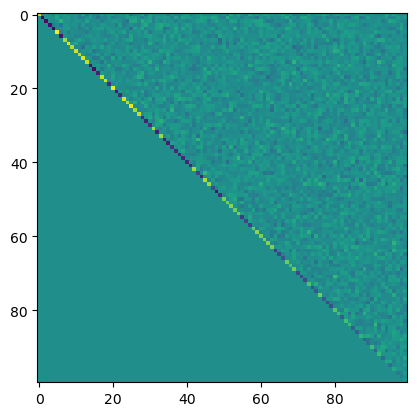

In [22]:
m=100
n=100
A=np.random.randn(m,n)
Q,R=np.linalg.qr(A)
Ainv=np.linalg.inv(R)@Q.T
Ainv2=np.linalg.inv(A)
plt.imshow(R)

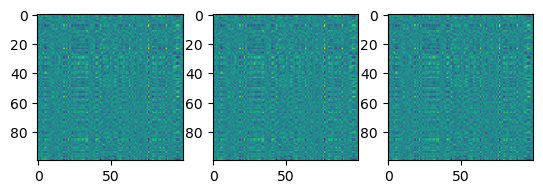

In [23]:
Ainv3=np.linalg.solve(R,Q.T)
plt.subplot(1,3,1)
plt.imshow(Ainv)
plt.subplot(1,3,2)
plt.imshow(Ainv2)
plt.subplot(1,3,3)
plt.imshow(Ainv3)

In [24]:
np.corrcoef((Ainv.flatten(), Ainv3.flatten(), Ainv2.flatten()))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [25]:
Ainv.flatten()

array([ 0.02262686,  0.00833718, -0.01617563, ..., -0.23030859,
       -0.04897747,  0.14580813])

In [26]:
Ainv3.flatten().shape

(10000,)

In [27]:
E=np.array([[1,2], [3,4]])
print(E.flatten())

[1 2 3 4]


In [28]:
n=5
a=np.random.randn(n)
b=np.random.randn(n)
A=np.eye(n) - np.outer(a,b)
Ai=np.eye(n) + np.outer(a,b)/(1-np.dot(a,b))
print(np.round(A@Ai, 3))

[[ 1. -0. -0. -0.  0.]
 [-0.  1.  0.  0. -0.]
 [-0. -0.  1.  0. -0.]
 [ 0.  0. -0.  1.  0.]
 [ 0. -0. -0. -0.  1.]]


In [29]:
a=a/np.linalg.norm(a)
b=a
A=np.eye(n) - np.outer(a,b)
Ai=np.eye(n) + np.outer(a,b)/(1-np.dot(a,b))
print(np.round(A@Ai, 3))

[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]


/tmp/ipykernel_3307/1086543352.py:4: RuntimeWarning: divide by zero encountered in divide
  Ai=np.eye(n) + np.outer(a,b)/(1-np.dot(a,b))
/tmp/ipykernel_3307/1086543352.py:5: RuntimeWarning: invalid value encountered in matmul
  print(np.round(A@Ai, 3))


In [30]:
n=5
A=np.random.randn(n,n)
Q,R=np.linalg.qr(A)
print(np.round(A.T@A - R.T@R,3))

[[ 0. -0.  0. -0.  0.]
 [-0.  0.  0. -0.  0.]
 [ 0.  0.  0.  0. -0.]
 [-0. -0.  0. -0.  0.]
 [ 0.  0. -0.  0. -0.]]


In [31]:
m=10
n=3
X=np.random.randn(m,n)
y=np.random.randn(m,1)
np.shape(y)

(10, 1)

In [32]:
Xy=sym.Matrix(np.concatenate([X,y], axis=1))
print(Xy.rref())

(Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]]), (0, 1, 2, 3))


In [33]:
XtX=X.T@X
Xty=X.T@y
normEQ=sym.Matrix(np.concatenate([XtX,Xty], axis=1))
Xsol=normEQ.rref()
Xsol=Xsol[0]
beta=Xsol[:, -1]
print(np.array(Xsol))
print()
print(beta)
print()
beta2=np.linalg.inv(XtX)@Xty
print(beta2)
print()
beta3=np.linalg.solve(XtX,Xty)
print(beta3)

[[1 0 0 0.254634403047627]
 [0 1 0 0.0895684377132522]
 [0 0 1 0.329926103468682]]

Matrix([[0.254634403047627], [0.0895684377132522], [0.329926103468682]])

[[0.2546344 ]
 [0.08956844]
 [0.3299261 ]]

[[0.2546344 ]
 [0.08956844]
 [0.3299261 ]]


In [34]:
data=np.array([[-4,0,-3,1,2,8,5,8]]).T
N=len(data)
X=np.ones([N,1])
b=np.linalg.solve(X.T@X, X.T@data)
m=np.mean(data)
print(b,m)

[[2.125]] 2.125


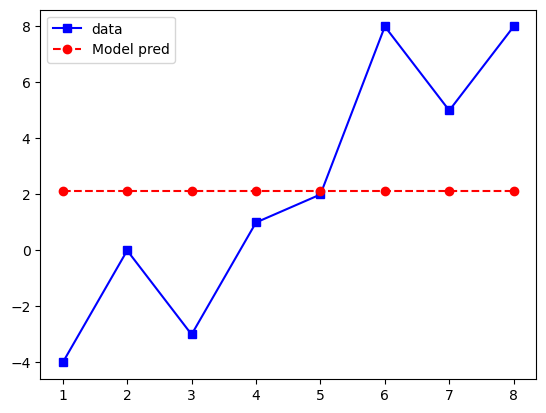

In [35]:
yHat=X@b
plt.plot(np.arange(1,N+1), data, 'bs-', label='data')
plt.plot(np.arange(1,N+1), yHat, 'ro--', label='Model pred')
plt.legend()

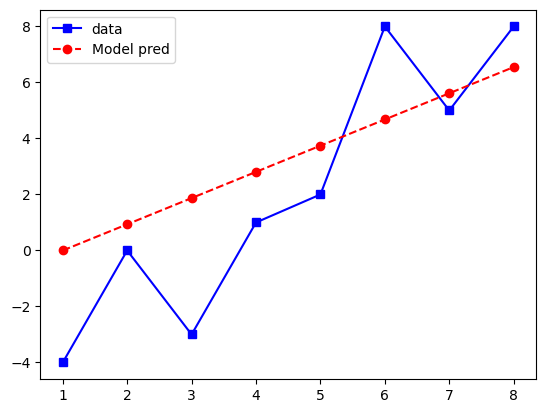

In [36]:
X=np.array([np.arange(0,N)]).T
b=np.linalg.solve(X.T@X, X.T@data)
yHat=X@b
plt.plot(np.arange(1,N+1), data, 'bs-', label='data')
plt.plot(np.arange(1,N+1), yHat, 'ro--', label='Model pred')
plt.legend()

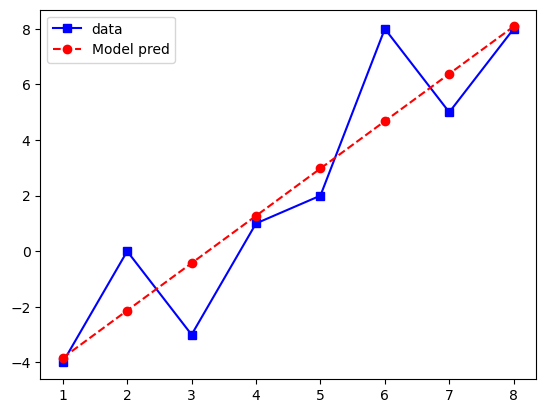

In [37]:
X=np.concatenate([np.ones([N,1]), np.array([np.arange(0,N)]).T], axis=1)
b=np.linalg.solve(X.T@X, X.T@data)
yHat=X@b
plt.plot(np.arange(1,N+1), data, 'bs-', label='data')
plt.plot(np.arange(1,N+1), yHat, 'ro--', label='Model pred')
plt.legend()

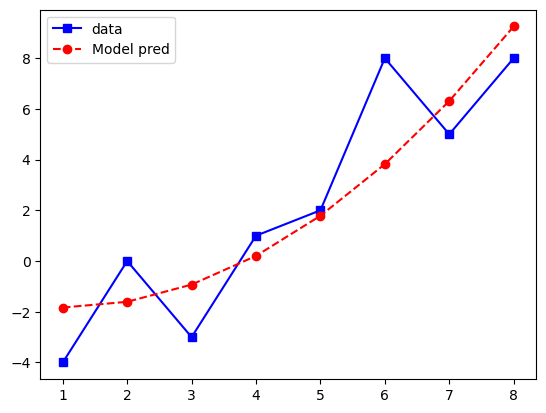

In [38]:
X=np.concatenate([np.ones([N,1]), np.array([np.arange(0,N)**2]).T], axis=1)
b=np.linalg.solve(X.T@X, X.T@data)
yHat=X@b
plt.plot(np.arange(1,N+1), data, 'bs-', label='data')
plt.plot(np.arange(1,N+1), yHat, 'ro--', label='Model pred')
plt.legend()

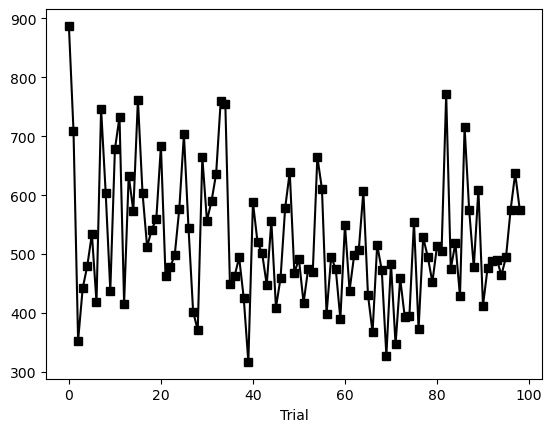

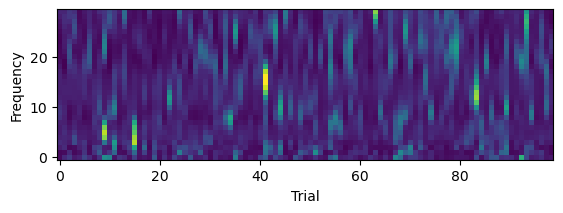

In [39]:
import scipy.io
data=scipy.io.loadmat('EEG_RT_data.mat')
rts=data['rts']
rts=rts[0]
EEGdata=data['EEGdata']
frex=data['frex']
frex=frex[0]
nTrials=len(rts)
nFrex=len(frex)
plt.plot(rts,'ks-')
plt.xlabel('Trial')
plt.show()

plt.imshow(EEGdata, origin='lower')
plt.xlabel('Trial')
plt.ylabel('Frequency')
plt.show()

In [40]:
X=np.concatenate([np.ones([nTrials-1,1]),  np.reshape(rts[0:-1], (nTrials-1,1)),
              np.reshape(EEGdata[10, :-1], (nTrials-1,1))   ], axis=1)
b1=np.linalg.solve(X.T@X,X.T@rts[1:])
b2=np.linalg.lstsq(X,rts[1:], rcond=None)[0]
print(b1)
print(b2)

[ 4.02435056e+02  2.25627111e-01 -2.33132473e+01]
[ 4.02435056e+02  2.25627111e-01 -2.33132473e+01]


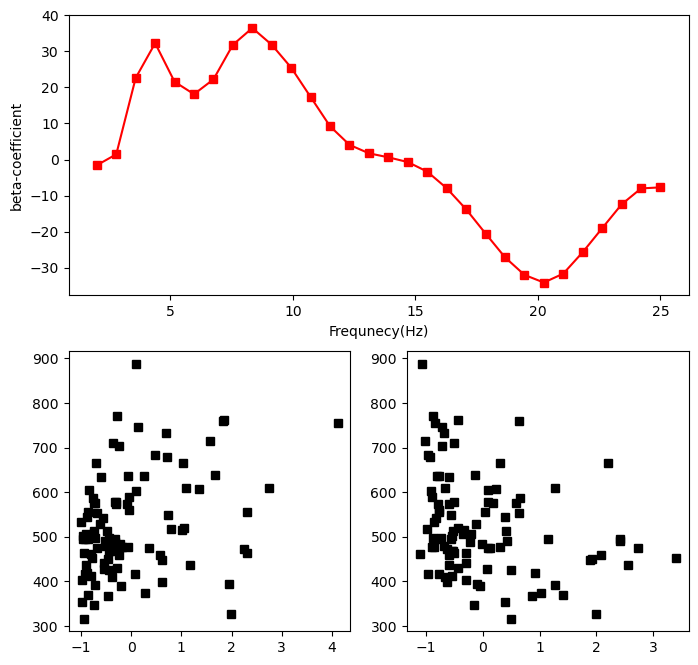

In [41]:
b=np.zeros(len(frex))
for fi in np.arange(0, len(frex)):
    X=np.concatenate([np.ones([nTrials,1]), np.reshape([EEGdata[fi, :]], (nTrials,1))], axis=1)
    t=np.linalg.lstsq(X,rts, rcond=None)[0]
    b[fi]=t[1]
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(frex,b,'rs-')
plt.xlabel('Frequnecy(Hz)')
plt.ylabel('beta-coefficient')
plt.subplot(2,2,3)
plt.plot(EEGdata[8, :], rts, 'ks' )
plt.subplot(2,2,4)
plt.plot(EEGdata[23, :], rts, 'ks' )





In [42]:
np.reshape(EEGdata[10, :-1], (nTrials-1,1)).shape

(98, 1)

In [43]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [44]:
EEGdata[10,]

array([ 0.07061781, -0.30021714, -0.8529997 , -0.65049797, -0.32436979,
       -0.78170975, -0.62290423, -0.26151693,  1.09224504, -0.55597681,
        0.79229007,  2.70894106, -0.77018662, -0.65588981, -0.27922768,
       -0.22170198, -0.72578729, -0.44439866, -0.82489696, -0.37158378,
       -0.228583  , -0.71812876,  1.53094495, -0.4890137 ,  0.09686956,
        0.03686633, -0.64295784, -0.74612362, -0.65064367, -0.72344692,
       -0.40403041,  0.3653927 , -0.23461943,  0.11700228,  0.721439  ,
        0.35862257, -0.29157711, -0.63558574, -0.8003905 , -0.44576209,
       -0.57751782,  0.69040433, -0.76081451,  0.19097812,  4.07578634,
       -0.52958017,  1.58168342, -0.2994171 ,  1.16597161,  0.45089464,
        0.88173022,  0.00745725, -0.77043557, -0.59065786, -0.30820588,
        0.53813702,  0.35384063, -0.88437926,  0.94471056, -0.68241982,
        0.19527962, -0.86081712, -0.70084206, -0.69544675,  1.62465901,
       -0.69242813, -0.61475924, -0.13516724,  0.64673603,  0.85

In [45]:
m=30
n=4
X=np.random.randn(m,n)
y=np.random.randn(m,1)
Q,R=np.linalg.qr(X, 'complete')
b1=np.linalg.solve(R.T@R, (R.T@Q)@y)
yHat1=X@b1
# print(np.mean(yHat-y))
b2=np.linalg.solve(X.T@X, X.T@y)
yHat2=X@b2
# print(np.mean(yHat2-y))
print(b1)
print(b2)

[[-0.09876068]
 [ 0.03486249]
 [-0.01722196]
 [ 0.0129503 ]]
[[-0.07104018]
 [ 0.03142984]
 [-0.31624224]
 [ 0.1312351 ]]


In [46]:
A=np.array([[1,5], [2,3]])
eigvals=np.linalg.eig(A)[0]
eigvec1=np.linalg.eig(A)[1][:,0]
eigvec2=np.linalg.eig(A)[1][:,1]

print(eigvals)

[-1.31662479  5.31662479]


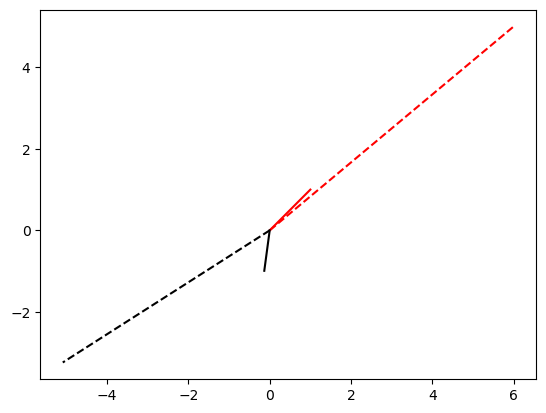

In [47]:
v1=np.array([1,1])
v2=np.random.randn(2,1)
v2=v2/np.linalg.norm(v2)
Av1=A@v1
Av2=A@v2
plt.plot([0, v1[0]], [0, v1[1]], 'r')
plt.plot([0, Av1[0]], [0, Av1[1]], 'r--')
plt.plot([0, v2[0][0]], [0, v2[1][0]], 'k')
plt.plot([0, Av2[0][0]], [0, Av2[1][0]], 'k--')


In [48]:
A=np.array([[-2,2,-3], [-4,1,-6], [-1,-2,0]])
evals=np.linalg.eig(A)[0]
evals

array([-3., -1.,  3.])

In [49]:
A=np.diag([2,3])
print(A)
np.linalg.eig(A) 

[[2 0]
 [0 3]]


(array([2., 3.]),
 array([[1., 0.],
        [0., 1.]]))

In [50]:
A=np.triu([[1,2],[3,4]])
print(A)
np.linalg.eig(A)

[[1 2]
 [0 4]]


(array([1., 4.]),
 array([[1.        , 0.5547002 ],
        [0.        , 0.83205029]]))

In [51]:
A=np.tril([[1,2],[3,4]])
print(A)
np.linalg.eig(A)

[[1 0]
 [3 4]]


(array([4., 1.]),
 array([[ 0.        ,  0.70710678],
        [ 1.        , -0.70710678]]))

In [52]:
A=np.diag((2,3,4))
np.linalg.eig(A)

(array([2., 3., 4.]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]))

In [53]:
A=np.triu([[1,2,3],[3,4,5],[5,6,7]])
print(A)
np.linalg.eig(A)

[[1 2 3]
 [0 4 5]
 [0 0 7]]


(array([1., 4., 7.]),
 array([[1.        , 0.5547002 , 0.47724234],
        [0.        , 0.83205029, 0.75354054],
        [0.        , 0.        , 0.45212432]]))

In [54]:
A=np.diag(np.arange(3,18))
print(A)
np.linalg.eig(A)

[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 17]]


(array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
        16., 17.]),
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.

In [55]:
A=np.triu(np.random.randn(4,4))
print(A)
np.linalg.eig(A)

[[ 1.0265196   1.15987947 -1.11147423  0.57715535]
 [ 0.          1.54932729  0.69910638 -0.27624663]
 [ 0.          0.         -0.1822172  -1.64235747]
 [ 0.          0.          0.          0.47843796]]


(array([ 1.0265196 ,  1.54932729, -0.1822172 ,  0.47843796]),
 array([[ 1.        ,  0.9116678 ,  0.77131908, -0.95104871],
        [ 0.        ,  0.41092799, -0.23827633,  0.17755128],
        [ 0.        ,  0.        ,  0.59016207, -0.23467152],
        [ 0.        ,  0.        ,  0.        ,  0.09439903]]))

In [56]:
A=np.random.randn(40,40)
print(A)
np.linalg.eig(A)

[[ 2.82822795e-02 -1.65896153e+00 -3.08748799e-01 ... -9.46293873e-01
  -8.02344281e-02  1.23121393e+00]
 [ 5.79729245e-01 -1.88421373e+00  3.33113433e-01 ...  5.39848769e-01
  -1.05242319e+00  1.73607637e+00]
 [-5.12153017e-02  1.59234361e-01  6.53213046e-02 ...  6.06258506e-01
  -2.64012647e-01 -1.20921247e+00]
 ...
 [-3.53524971e-01 -1.29032003e+00  9.75626548e-01 ... -1.04333250e+00
   7.95120955e-01  1.16064862e-01]
 [-2.98707563e-01 -1.49200908e+00 -5.95449734e-01 ...  7.42742327e-04
   3.79256480e-01  1.05822063e+00]
 [ 1.40492670e-01  3.71764861e-01  8.75840407e-01 ... -7.42112161e-01
  -4.25103375e-01 -3.10584693e-01]]


(array([-4.21199544+6.1872679j , -4.21199544-6.1872679j ,
         1.34315527+6.41421019j,  1.34315527-6.41421019j,
         3.22377352+4.77576898j,  3.22377352-4.77576898j,
         5.78077437+0.j        ,  5.5645018 +0.j        ,
         4.71148164+2.5429401j ,  4.71148164-2.5429401j ,
         4.38474001+2.8870658j ,  4.38474001-2.8870658j ,
        -5.93501688+2.69547662j, -5.93501688-2.69547662j,
        -6.33679988+0.j        , -5.2839534 +1.58444406j,
        -5.2839534 -1.58444406j, -2.02852329+4.96494084j,
        -2.02852329-4.96494084j, -1.22716484+4.6326252j ,
        -1.22716484-4.6326252j , -3.15752071+2.90791436j,
        -3.15752071-2.90791436j,  3.44973584+0.j        ,
         2.93678751+1.60641218j,  2.93678751-1.60641218j,
         0.6062762 +3.08949911j,  0.6062762 -3.08949911j,
         1.03827887+2.90336759j,  1.03827887-2.90336759j,
        -3.05565865+0.61997254j, -3.05565865-0.61997254j,
        -3.06987308+0.j        , -3.1807363 +0.j        ,
        -0.018

(-9.484510876438035, 9.15527827599634, -8.050107596370017, 10.589681556064358)

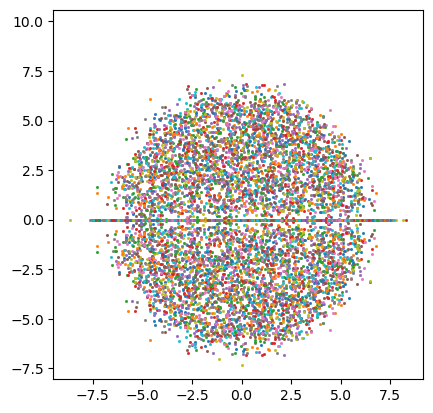

In [57]:
for i in range(200):
    A=np.random.randn(40,40)
    eigvals=np.linalg.eig(A)[0]
    plt.plot(np.real(eigvals), np.imag(eigvals), 's', markersize=1)
plt.axis('square')

In [58]:
A=np.array([[1,2],[2,1]])
evals,evecs=np.linalg.eig(A)
print(evals)
print()
print(evecs)
mag_v1=np.sqrt(np.sum(np.square(evecs[:,0])))
mag_v2=np.sqrt(np.sum(np.square(evecs[:,1])))
print(mag_v1,mag_v2)

[ 3. -1.]

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
0.9999999999999999 0.9999999999999999


(-0.7778174593052021,
 0.7778174593052023,
 -0.03535533905932738,
 1.520279579551077)

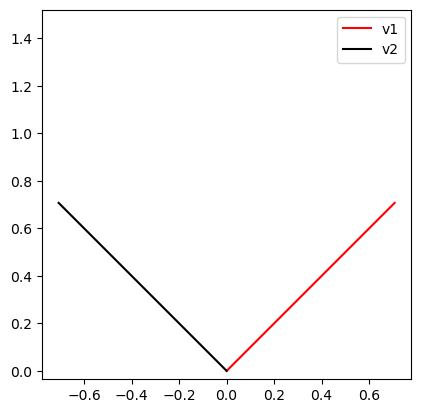

In [59]:
plt.plot([0, evecs[0,0]], [0, evecs[1,0]], 'r', label='v1')
plt.plot([0, evecs[0,1]], [0, evecs[1,1]], 'k', label='v2')
plt.legend()
plt.axis('square')

In [60]:
A=np.array([[3,1], [4,6]])
np.linalg.eig(A)

(array([2., 7.]),
 array([[-0.70710678, -0.24253563],
        [ 0.70710678, -0.9701425 ]]))

In [61]:
np.array([1,4])/4.12

array([0.24271845, 0.97087379])

In [62]:
A=np.array([[1,2,3], [4,3,7], [3,3,6]])
np.linalg.eig(A)

(array([ 1.10000000e+01, -1.00000000e+00, -5.26572215e-16]),
 array([[ 3.28859532e-01,  7.07106781e-01, -5.77350269e-01],
        [ 7.09644254e-01, -7.07106781e-01, -5.77350269e-01],
        [ 6.23102272e-01, -1.87113701e-16,  5.77350269e-01]]))

Text(0.5, 1.0, 'Vinv')

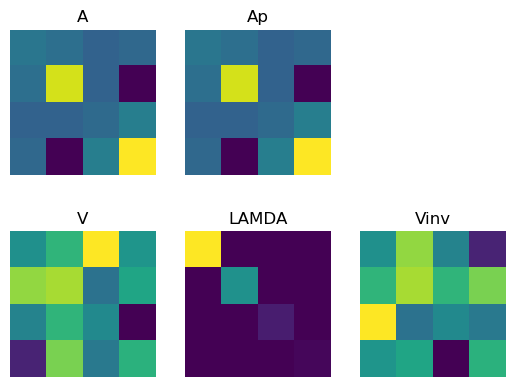

In [63]:
A=np.round(10*np.random.randn(4,4))
A=A.T@A
evals,evecs=np.linalg.eig(A)
Ap=evecs@np.diag(evals)@np.linalg.inv(evecs)
plt.subplot(2,3,1)
plt.imshow(A)
plt.axis('off')
plt.title('A')

plt.subplot(2,3,2)
plt.imshow(Ap)
plt.axis('off')
plt.title('Ap')

plt.subplot(2,3,4)
plt.imshow(evecs)
plt.axis('off')
plt.title('V')

plt.subplot(2,3,5)
plt.imshow(np.diag(evals))
plt.axis('off')
plt.title('LAMDA')

plt.subplot(2,3,6)
plt.imshow(np.linalg.inv(evecs))
plt.axis('off')
plt.title('Vinv')







In [64]:
recondiff=A-Ap
rmseA=np.sqrt(np.mean(np.square(np.reshape(recondiff, (1,-1)))))
print('REconstruction error: ', rmseA)

REconstruction error:  2.528424168511106e-13


In [65]:
recondiff.shape

(4, 4)

In [66]:
np.sqrt(np.mean(np.square(recondiff)))

2.528424168511106e-13

In [67]:
A=np.random.randn(4,4)
A3_1=np.linalg.matrix_power(A,3)
evals,evecs=np.linalg.eig(A)
A=evecs@np.diag(evals)@np.linalg.inv(evecs)
A3_2=evecs@(np.linalg.matrix_power(np.diag(evals),3))@np.linalg.inv(evecs)
np.round(A3_2,10)==np.round(A3_1,10)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

[[ 0.42029326 -0.70104655 -0.57609661]
 [-0.82392955 -0.56082169  0.08135801]
 [ 0.38012323 -0.4404688   0.81332255]]

[[-0.57609661 -0.70104655 -0.42029326]
 [ 0.08135801 -0.56082169  0.82392955]
 [ 0.81332255 -0.4404688  -0.38012323]]


Text(0.5, 1.0, 'evecs of A**3')

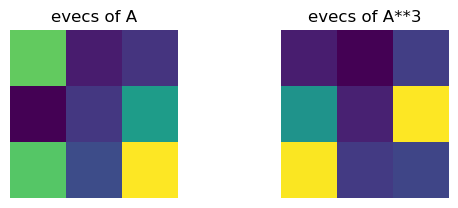

In [68]:
A=np.random.randn(3,3)
A=A.T@A
D,V=np.linalg.eig(A)
D3,V3=np.linalg.eig(np.linalg.matrix_power(A,3))
print(V)
print()
print(V3)
# D=np.diag(D)
# D3=np.diag(D3)

# np.round(D**3,3)==np.round(D3,3)
plt.subplot(2,2,1)
plt.imshow(V)
plt.axis('off')
plt.title('evecs of A')

plt.subplot(2,2,2)
plt.imshow(V3)
plt.axis('off')
plt.title('evecs of A**3')

# plt.subplot(2,2,3)
# plt.imshow(D)
# plt.axis('off')
# plt.title('evals of A')

# plt.subplot(2,2,4)
# plt.imshow(D3)
# plt.axis('off')
# plt.title('evals of A**3')

















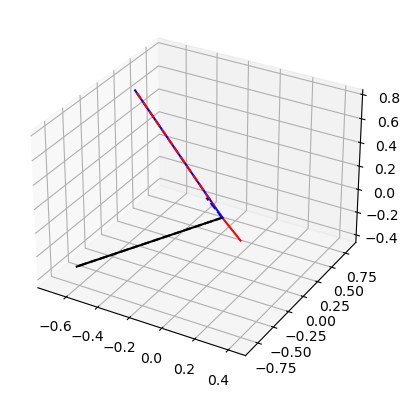

In [69]:
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.plot([0, V[0,0]], [0, V[1,0]], [0, V[2,0]], 'r')
ax.plot([0, V[0,1]], [0, V[1,1]], [0, V[2,1]], 'k')
ax.plot([0, V[0,2]], [0, V[1,2]], [0, V[2,2]], 'b')

ax.plot([0, V3[0,0]], [0, V3[1,0]], [0, V3[2,0]], 'r--')
ax.plot([0, V3[0,1]], [0, V3[1,1]], [0, V3[2,1]], 'k--')
ax.plot([0, V3[0,2]], [0, V3[1,2]], [0, V3[2,2]], 'b--')






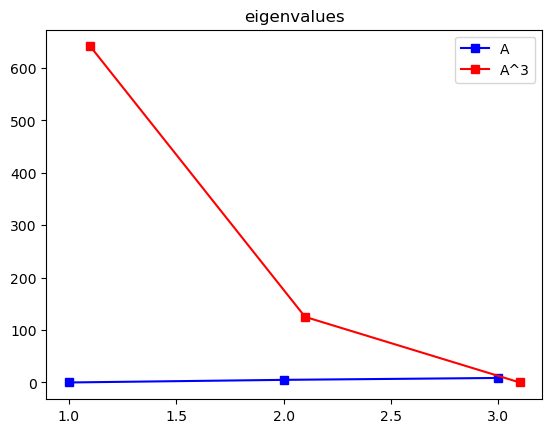

In [70]:
plt.plot([1,2,3], D, 'bs-', label='A')
plt.plot([1.1,2.1,3.1], D3, 'rs-', label='A^3')
plt.title('eigenvalues')
plt.legend()

In [71]:
D**3

array([6.71147790e-07, 1.25187691e+02, 6.41038610e+02])

In [72]:
A=np.random.randn(5,5)
B=np.random.randn(5,5)
A=A.T@A
B=B.T@B
D,V=np.linalg.eig(A-B)
D2,V2=np.linalg.eig(np.linalg.matrix_power(A-B, 2))
print(np.round(V,3))
print()
print(np.round(V2,3))
print()
print(np.round(D,3))
print()
print(np.round(D2,3))
print(np.round(D**2,3))

[[ 0.195 -0.652  0.527  0.507 -0.047]
 [-0.393 -0.077  0.391 -0.282  0.779]
 [ 0.493  0.647  0.579  0.043  0.038]
 [ 0.042 -0.268  0.352 -0.769 -0.46 ]
 [ 0.75  -0.281 -0.333 -0.265  0.421]]

[[-0.652 -0.195  0.047  0.507  0.527]
 [-0.077  0.393 -0.779 -0.282  0.391]
 [ 0.647 -0.493 -0.038  0.043  0.579]
 [-0.268 -0.042  0.46  -0.769  0.352]
 [-0.281 -0.75  -0.421 -0.265 -0.333]]

[ 5.2   -5.071  0.878 -0.23  -3.108]

[25.716 27.041  9.659  0.053  0.772]
[27.041 25.716  0.772  0.053  9.659]


In [73]:
sidx1=np.argsort(abs(D))
sidx2=np.argsort(D2)
D=D[sidx1]
D2=D2[sidx2]
print(D,D2)

[-0.22967056  0.87849719 -3.10795892 -5.07108897  5.20006089] [ 0.05274856  0.77175732  9.65940864 25.71594334 27.04063324]


In [74]:
V=V[:, sidx1]
V2=V2[:, sidx2]
np.round(V-V2,3)

array([[ 0.   ,  0.   , -0.094,  0.   ,  0.391],
       [ 0.   , -0.   ,  1.558,  0.   , -0.786],
       [ 0.   , -0.   ,  0.076,  0.   ,  0.986],
       [ 0.   , -0.   , -0.92 , -0.   ,  0.084],
       [-0.   , -0.   ,  0.843,  0.   ,  1.5  ]])

In [75]:
print(np.round(V,3))
print()
print(np.round(V2,3))

[[ 0.507  0.527 -0.047 -0.652  0.195]
 [-0.282  0.391  0.779 -0.077 -0.393]
 [ 0.043  0.579  0.038  0.647  0.493]
 [-0.769  0.352 -0.46  -0.268  0.042]
 [-0.265 -0.333  0.421 -0.281  0.75 ]]

[[ 0.507  0.527  0.047 -0.652 -0.195]
 [-0.282  0.391 -0.779 -0.077  0.393]
 [ 0.043  0.579 -0.038  0.647 -0.493]
 [-0.769  0.352  0.46  -0.268 -0.042]
 [-0.265 -0.333 -0.421 -0.281 -0.75 ]]


In [76]:
A=np.random.randn(14,14)
A=(A.T+A)/2
evals,evecs=np.linalg.eig(A)
print(np.sqrt(sum(evecs**2)))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Text(0.5, 1.0, 'V^TV')

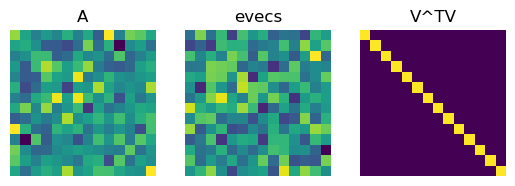

In [77]:
plt.subplot(1,3,1)
plt.imshow(A)    
plt.axis('off')
plt.title('A')

plt.subplot(1,3,2)
plt.imshow(evecs)    
plt.axis('off')
plt.title('evecs')


plt.subplot(1,3,3)
plt.imshow(evecs@evecs.T)    
plt.axis('off')
plt.title('V^TV')















In [78]:
A=np.random.randn(5,5)
A=np.round(10*A.T@A)
evals,evecs=np.linalg.eig(A)
v1=evecs[:,0]
outer_v1=np.outer(v1,v1)
norm_v1=np.linalg.norm(outer_v1)
print(norm_v1)
print()
A1=np.zeros((5,5))
for i in range(0,5):
    layer_i=evals[i]*np.outer(evecs[:,i],evecs[:,i])
    A1+=layer_i
    print(evals[i])
    print(np.linalg.norm(layer_i))
print(np.round(A-A1),3)

1.0

147.77868695365532
147.77868695365532
130.52180477314474
130.52180477314474
0.6739633309342545
0.6739633309342546
31.880235852367832
31.88023585236783
54.14530908989779
54.145309089897786
[[ 0. -0.  0. -0. -0.]
 [-0.  0.  0. -0. -0.]
 [ 0.  0. -0.  0.  0.]
 [-0. -0.  0.  0.  0.]
 [-0. -0.  0.  0. -0.]] 3


In [79]:
A1=np.zeros((5,5))
for i in range(5):
    
    layer_i=evecs[:,i]*evals[i]*(np.reshape(evecs[:,i], (5,1)))
    A1+=layer_i
    print(evals[i])
    print(np.linalg.norm(layer_i))
print(A-A1)

147.77868695365532
147.77868695365532
130.52180477314474
130.52180477314474
0.6739633309342545
0.6739633309342546
31.880235852367832
31.88023585236783
54.14530908989779
54.145309089897786
[[ 5.68434189e-14 -1.77635684e-14  1.42108547e-14 -1.42108547e-14
  -7.10542736e-14]
 [-1.77635684e-14  1.42108547e-14  3.55271368e-15 -5.50670620e-14
  -3.33066907e-14]
 [ 1.42108547e-14  3.55271368e-15  0.00000000e+00  2.22044605e-14
   3.55271368e-14]
 [-1.42108547e-14 -5.59552404e-14  2.35367281e-14  9.94759830e-14
   1.42108547e-14]
 [-6.39488462e-14 -3.33066907e-14  3.55271368e-14  7.10542736e-15
  -1.13686838e-13]]


In [80]:
v1.T

array([ 0.52385498, -0.10485689,  0.0625104 ,  0.69268792,  0.48047568])

In [81]:
v1

array([ 0.52385498, -0.10485689,  0.0625104 ,  0.69268792,  0.48047568])

In [82]:
det1=1
tr1=0
for i in range(5):
    tr1+=evals[i]
    det1*=evals[i]
print(det1)
print(np.linalg.det(A))
print()
print(np.trace(A))
print(tr1)

22439517.000000726
22439516.999999903

365.0
364.99999999999994


In [83]:
A=np.random.randn(5,5)
A[:,0]=A[:, 1]
evals,evecs=np.linalg.eig(A)
det1=1
tr1=0
for i in range(5):
    tr1+=evals[i]
    det1*=evals[i]
print(det1)
print(np.linalg.det(A))
print()
print(np.matrix.trace(A))
print(tr1)

(-3.809720869229466e-16+0j)
0.0

-1.8613193967475625
(-1.861319396747564+0j)


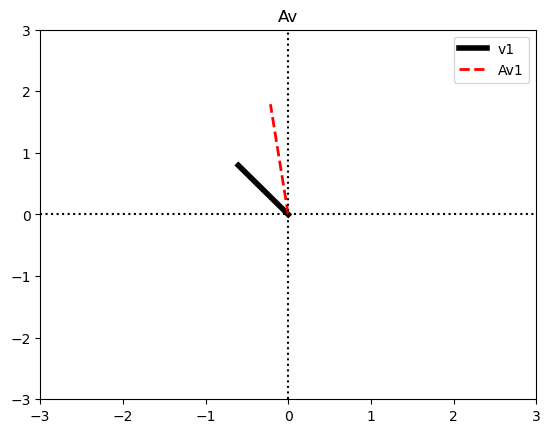

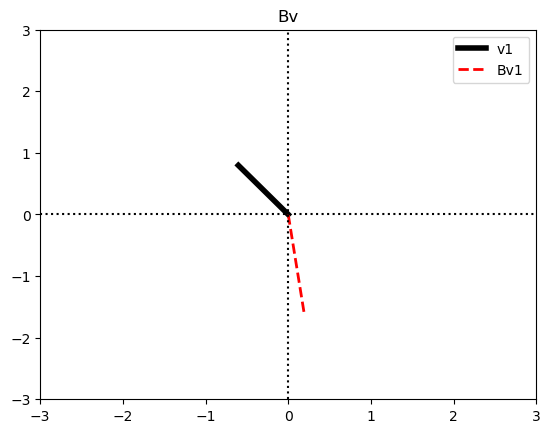

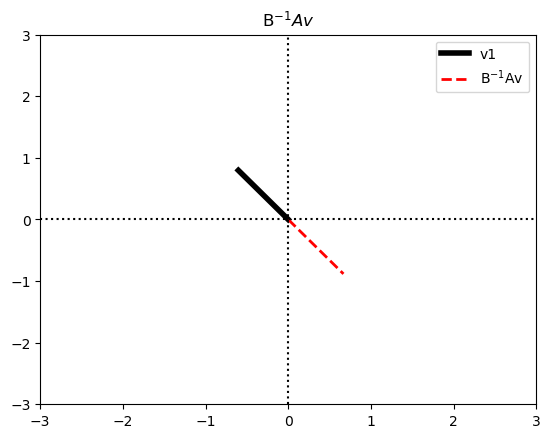

In [84]:
import scipy.linalg
A=np.array([[3,2], [1,3]])
B=np.array([[1,1], [4,1]])
evals,evecs=scipy.linalg.eig(A,B)
Av=A@evecs[:, 0]
Bv=B@evecs[:, 0]
BinvAv=np.linalg.inv(B)@A@evecs[:, 0]
plt.plot([0, evecs[0,0]], [0, evecs[1,0]], 'k', linewidth=4 , label='v1')
plt.plot([0, Av[0]],[0, Av[1]], 'r--', linewidth=2, label='Av1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.plot([-3,3],[0,0], 'k:')
plt.plot([0,0],[-3,3], 'k:')

plt.legend()
plt.title('Av')
plt.show()

plt.plot([0, evecs[0,0]], [0, evecs[1,0]], 'k', linewidth=4 , label='v1')
plt.plot([0, Bv[0]], [0, Bv[1]], 'r--', linewidth=2, label='Bv1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.plot([-3,3],[0,0], 'k:')
plt.plot([0,0],[-3,3], 'k:')
plt.legend()
plt.title('Bv')
plt.show()

plt.plot([0, evecs[0,0]], [0, evecs[1,0]], 'k', linewidth=4 , label='v1')
plt.plot([0, BinvAv[0]], [0, BinvAv[1]], 'r--', linewidth=2, label='B$^{-1}$Av')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.plot([-3,3],[0,0], 'k:')
plt.plot([0,0],[-3,3], 'k:')
plt.legend()
plt.title('B$^{-1}Av$')
plt.show()





In [85]:
Av[0]

-0.21499528282430835

In [86]:
scipy.linalg.eig(A,B)

(array([-1.10727513+0.j,  2.10727513+0.j]),
 array([[-0.60332746, -0.11930764],
        [ 0.79749356, -0.99285733]]))

[0.+0.j 0.+0.j]

[[ 0.    -0.061]
 [ 0.    -1.999]]


(-0.07846289157894693,
 2.120523480119042,
 -1.0994931858489942,
 1.0994931858489942)

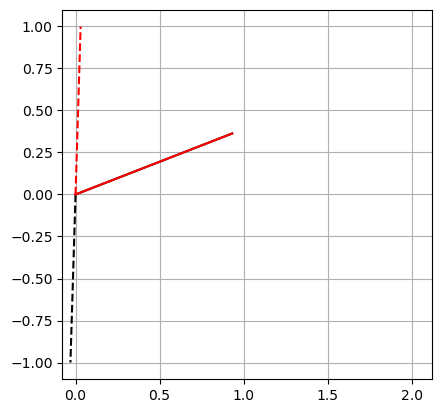

In [87]:
# Av=lam*Bv
m=2
A=np.random.randn(m,m)
A=A.T@A
B=np.random.randn(m,m)
B=B.T@B
D,V=scipy.linalg.eig(A,B)
BinvA=np.linalg.inv(B)@A
D1,V1=np.linalg.eig(BinvA)
print(np.round(D-D1,3))
print()
print(np.round(V-V1,3))
plt.plot([0, V[0,0]], [0, V[1,0]], 'k')
plt.plot([0, V[0,1]], [0, V[1,1]], 'k--')
plt.plot([0, V1[0,0]], [0, V1[1,0]], 'r')
plt.plot([0, V1[0,1]], [0, V1[1,1]], 'r--')
plt.grid()
plt.axis('square')

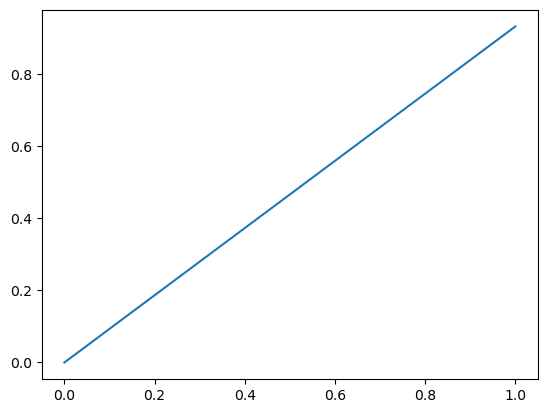

In [88]:
plt.plot([0, V[0,0]])

Text(0.5, 1.0, 'R matrix')

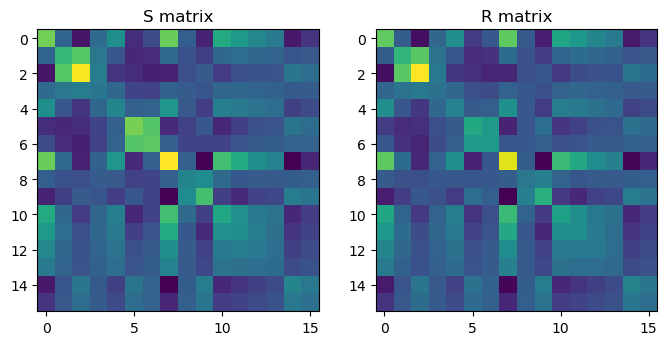

In [89]:
from scipy.io import loadmat
data=loadmat('real_matrices.mat')
S=data['S']
R=data['R']
fig,ax=plt.subplots(1,2, figsize=(8,5))
ax[0].imshow(S)
ax[0].set_title('S matrix')
ax[1].imshow(R)
ax[1].set_title('R matrix')

In [90]:
R.shape

(16, 16)

In [91]:
S.shape

(16, 16)

In [92]:
np.linalg.matrix_rank(R)

14

(0.0, 3.0)

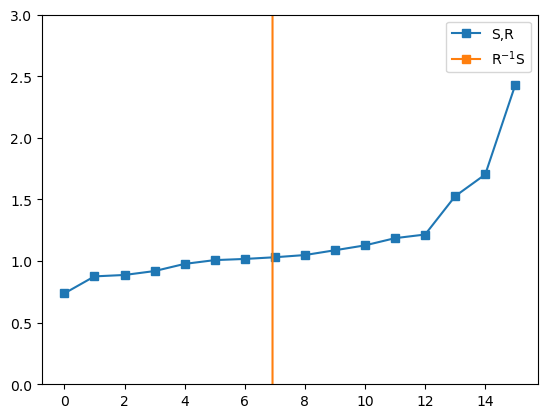

In [93]:
D,V=scipy.linalg.eigh(S,R)
D2,V2=scipy.linalg.eigh(np.linalg.inv(R)@S)
plt.plot(D, 's-', label='S,R')
plt.plot(D2, 's-', label='R$^{-1}$S')
plt.legend()
plt.ylim([0,3])

In [94]:
A=[[3,0,5], [8,1,3]]
U,s,Vt=np.linalg.svd(A)
print(U)
print()
print(s)
print()
print(Vt)

[[-0.52138438 -0.85332193]
 [-0.85332193  0.52138438]]

[9.89086518 3.18916698]

[[-0.84833111 -0.08627374 -0.52238986]
 [ 0.50518185  0.16348607 -0.84738634]
 [-0.15851066  0.98276607  0.09510639]]


(-0.5, 2.5, 2.5, -0.5)

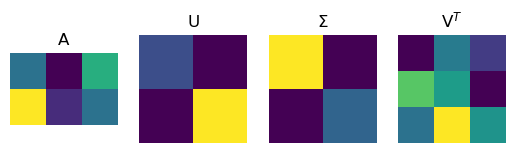

In [95]:
plt.subplot(1,4,1)
plt.imshow(A)
plt.title('A')
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(U)
plt.title('U')
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(np.diag(s))
plt.title('$\Sigma$')
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(Vt)
plt.title('V$^T$')
plt.axis('off')























In [96]:
n=5
A=np.random.randn(n,n)
A=A.T@A
U,s,Vt=np.linalg.svd(A)
V=Vt.T
S=np.diag(s)
eigvals_AtA,eigvecs_AtA=np.linalg.eig(A.T@A)

eigvals_AAt,eigvecs_AAt=np.linalg.eig(A@A.T)
eigvals_A,eigvecs_A=np.linalg.eig(A)

print(eigvals_AtA)
print(np.square(s))


[6.95994640e+01 3.25776231e+01 3.28513056e+00 5.67657450e-09
 8.55742628e-03]
[6.95994640e+01 3.25776231e+01 3.28513056e+00 8.55742628e-03
 5.67657341e-09]


Text(0.5, 1.0, 'V in svd')

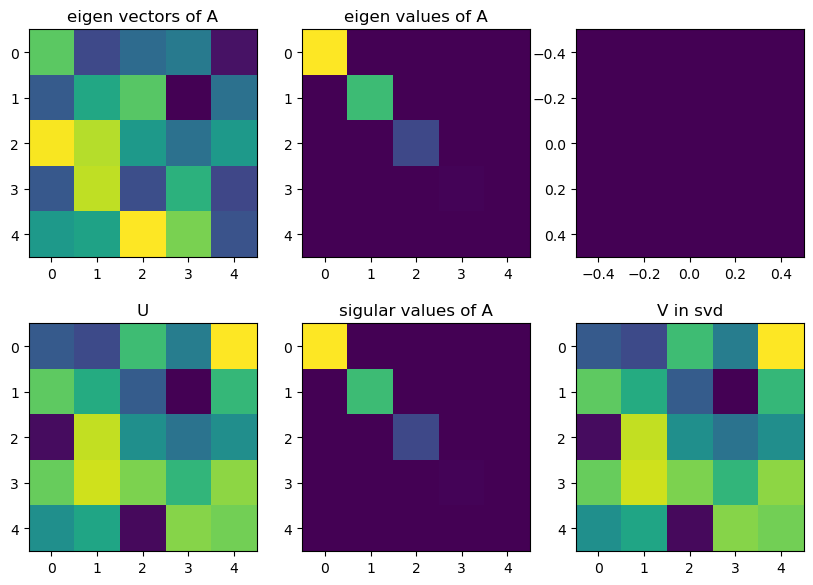

In [97]:
sidx=np.argsort(eigvals_A)[::-1]
l=eigvals_A[sidx]
W=eigvecs_A[:, sidx]
fig,ax=plt.subplots(2,3, figsize=(10,7))
ax[0,0].imshow(W)
ax[0,0].set_title('eigen vectors of A')
ax[0,1].imshow(np.diag(l))
ax[0,1].set_title('eigen values of A')
ax[0,2].imshow(np.zeros((1,1)))
# ax[0,0].set_title('eigen vectors of A')
ax[1,0].imshow(U)
ax[1,0].set_title('U')
ax[1,1].imshow(S)
ax[1,1].set_title('sigular values of A')
ax[1,2].imshow(V)
ax[1,2].set_title('V in svd')























In [98]:
print( np.round(U-V,3))

[[ 0.  0.  0.  0.  0.]
 [-0. -0. -0.  0.  0.]
 [-0.  0.  0. -0.  0.]
 [-0.  0.  0.  0. -0.]
 [-0.  0. -0.  0. -0.]]


In [99]:
print(np.round(np.abs(U)-np.abs(W),3))

[[-0.  0.  0. -0.  0.]
 [-0.  0.  0. -0.  0.]
 [ 0. -0. -0.  0. -0.]
 [-0.  0.  0.  0. -0.]
 [ 0. -0.  0.  0. -0.]]


In [100]:
A=np.array([[3,1,7],[1,1,12]])
print(np.sort(np.linalg.eig(A.T@A)[0]))
print(np.sort(np.linalg.svd(A)[1])**2)


[3.14485466e-15 4.33559708e+00 2.00664403e+02]
[  4.33559708 200.66440292]


In [101]:
print(np.sort(np.linalg.eig(A.T@A)[0]))
print(np.sort(np.linalg.svd(A.T@A)[1]))


[3.14485466e-15 4.33559708e+00 2.00664403e+02]
[8.74918534e-16 4.33559708e+00 2.00664403e+02]


In [102]:
A=np.random.randn(4,4)
print(np.sort(np.linalg.eig(A)[0]))
print(np.sort(np.linalg.svd(A)[1]))


[-2.14835674 -1.21425521  0.58189107  2.48137648]
[0.36906478 1.7537978  1.91387749 3.04056632]


In [103]:
# A@A.T=U@SIGMA**2@U.T
m=3
n=6
A=np.random.randn(m,n)
AAt=A@A.T
sigma2,U=np.linalg.eig(AAt)
U2,s,Vt=np.linalg.svd(A)
print(U)
print(U2)
AtA=A.T@A
sigma2_2,V=np.linalg.eig(AtA)
sidx=np.argsort(sigma2_2)[::-1]
sigma2_2=sigma2_2[sidx]
V=V[:, sidx]
print(Vt.T)
print()
print(V)

[[-0.23770403  0.868801   -0.43437497]
 [ 0.5894352  -0.22642472 -0.77543406]
 [ 0.77205112  0.4403597   0.45827982]]
[[-0.23770403 -0.43437497  0.868801  ]
 [ 0.5894352  -0.77543406 -0.22642472]
 [ 0.77205112  0.45827982  0.4403597 ]]
[[-0.61291235  0.35799543 -0.28250277 -0.31548824  0.52195239 -0.21071969]
 [ 0.37594813 -0.09493623  0.29285142 -0.85344784  0.08041873 -0.1704341 ]
 [-0.53226962 -0.32272543  0.49697944 -0.14382005  0.01537919  0.5870503 ]
 [-0.04536882 -0.76649707  0.01512398  0.19782191  0.42340165 -0.43794145]
 [ 0.4061042   0.26212235  0.27426693  0.24791562  0.72532429  0.32185621]
 [ 0.18086339 -0.32007625 -0.71553517 -0.22541981  0.12448986  0.53529173]]

[[-0.61291235+0.j          0.35799543+0.j         -0.28250277+0.j
   0.06401309+0.j          0.46463149-0.10346152j  0.46463149+0.10346152j]
 [ 0.37594813+0.j         -0.09493623+0.j          0.29285142+0.j
   0.73007215+0.j          0.06776371-0.02017661j  0.06776371+0.02017661j]
 [-0.53226962+0.j         -0.3

In [104]:
U=np.zeros((m,m))
for i in range(m):
    U[:, i]=(A@V[:, i].T)/np.sqrt(sigma2_2[i])
print(np.round(np.abs(U)-np.abs(U2), 3))

[[ 0. -0.  0.]
 [-0.  0. -0.]
 [ 0.  0.  0.]]


/tmp/ipykernel_3307/3515955823.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  U[:, i]=(A@V[:, i].T)/np.sqrt(sigma2_2[i])


In [105]:
m=4

A=np.random.randn(m,m)
AtA=A.T@A
AAt=A@A.T
U,s,Vt=np.linalg.svd(AtA)
diffs=np.zeros(m)
for i in range(m):
    diffs[i]=np.sqrt(sum((AAt@A@Vt.T[:, i] - A@Vt.T[:, i]*s[i])**2))
print(diffs)

[1.62805794e-14 3.98444798e-15 3.19104635e-15 7.36473481e-15]


In [106]:
# m=4
# A=np.random.randn(m,m)
# AtA=A.T@A
# AAt=A@A.T
# U,s,Vt=np.linalg.svd(AtA)
diffs=np.zeros(m)
for i in range(m):
    diffs[i]=sum(AAt@A@U[:, i] - A@U[:, i]*s[i])
print(diffs)

[-2.57571742e-14 -3.38618023e-14 -9.67281810e-15 -5.98797406e-15]


In [107]:
np.round(U-Vt.T,3)

array([[-0., -0., -0.,  0.],
       [ 0., -0., -0., -0.],
       [-0., -0., -0., -0.],
       [ 0., -0., -0.,  0.]])

In [108]:
Vt

array([[-0.12755646,  0.38655751, -0.37452128,  0.8330885 ],
       [-0.56917153, -0.40103419,  0.61247894,  0.37427916],
       [ 0.25494936, -0.82943795, -0.44340024,  0.22456568],
       [ 0.77121588,  0.04216114,  0.53665593,  0.33977774]])

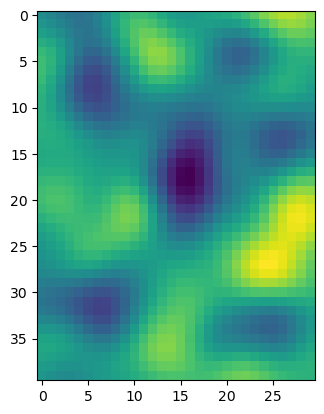

In [109]:
m=40
n=30
k=(m+n)//4
xx=np.linspace(-3,3,k)
[X,Y]=np.meshgrid(xx,xx)
g2d=np.exp(-(X**2+Y**2)/(k/8))
A=scipy.signal.convolve2d(np.random.randn(m,n), g2d, 'same')
plt.imshow(A)

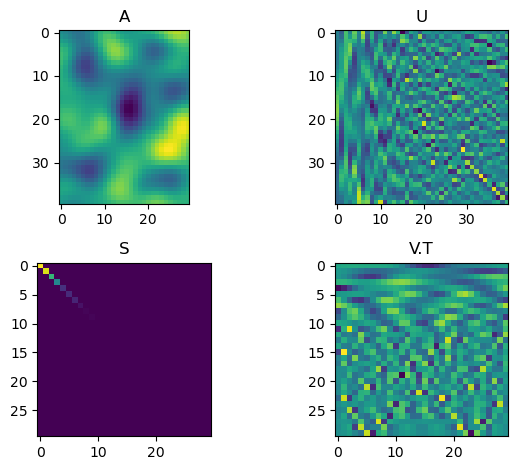

In [110]:
U,s,Vt=np.linalg.svd(A)
plt.subplot(2,2,1)
plt.imshow(A)
plt.title('A')

plt.subplot(2,2,2)
plt.imshow(U)
plt.title('U')

plt.subplot(2,2,3)
plt.imshow(np.diag(s))
plt.title('S')

plt.subplot(2,2,4)
plt.imshow(Vt)
plt.title('V.T')
plt.tight_layout()



Text(0.5, 1.0, 'scree plot of singular values')

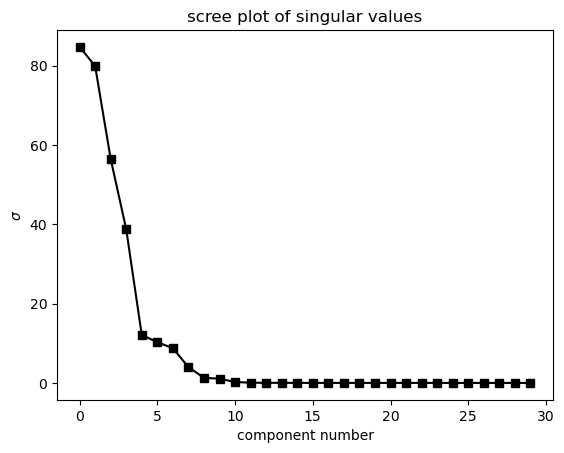

In [111]:
plt.plot(s,'ks-')
plt.xlabel('component number')
plt.ylabel('$\sigma$')
plt.title('scree plot of singular values')


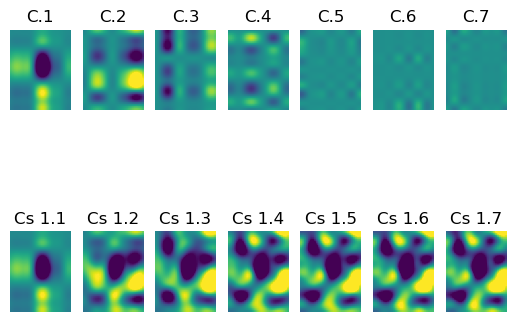

In [112]:
rank1mats=np.zeros((7,m,n))
for i in range(7):
    rank1mats[i, : ,: ]=np.outer(U[: ,i]*s[i], Vt[i, :])
    plt.subplot2grid((2,7),(0,i))
    plt.imshow(rank1mats[i, :, :], vmin=-5, vmax=5)
    plt.axis('off')
    plt.title('C.%d' %(i+1))
    
    plt.subplot2grid((2,7),(1,i))
    imdat=np.sum(rank1mats[:i+1, :, :], axis=0)
    plt.imshow(imdat, vmin=-5, vmax=5)
    plt.axis('off')
    plt.title('Cs 1.%d' %(i+1))
    
plt.show()
    
    
    
    
    
    
    
    
    
    
    
    
    

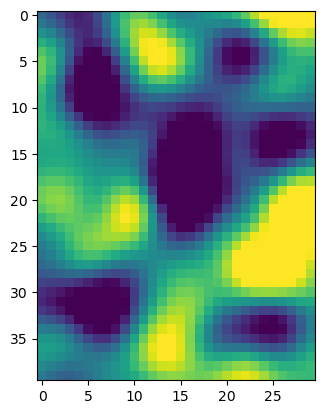

In [113]:
plt.imshow(A,vmin=-5,vmax=5)

rank:  7


Text(0.5, 1.0, 'error')

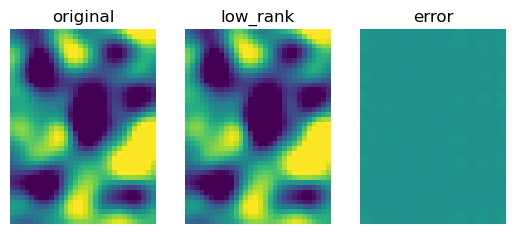

In [114]:
nComps=7
Ur=U[:, 0:nComps]
sr=s[0:nComps]
Vtr=Vt[0:nComps, :]
reconImage=Ur@np.diag(sr)@Vtr
print('rank: ', np.linalg.matrix_rank(reconImage))
errormap=np.sqrt((reconImage-A)**2)
plt.subplot(1,3,1)
plt.imshow(A,vmin=-5,vmax=5)
plt.axis('off')
plt.title('original')

plt.subplot(1,3,2)
plt.imshow(reconImage, vmin=-5, vmax=5)
plt.axis('off')
plt.title('low_rank')

plt.subplot(1,3,3)
plt.imshow(errormap,vmin=-5, vmax=5)
plt.axis('off')
plt.title('error')






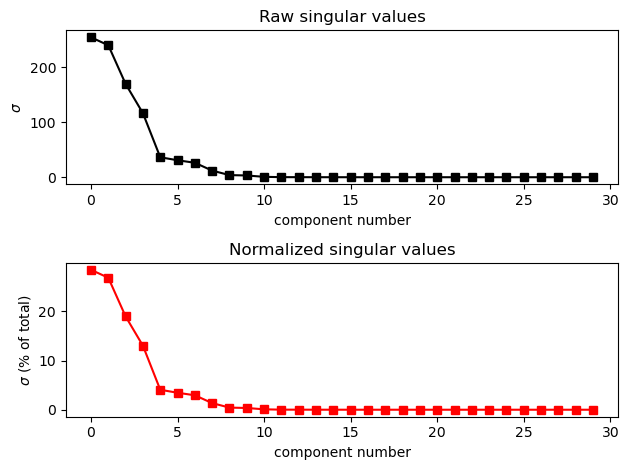

In [115]:
Ascaled=A*3
U,s,Vt=np.linalg.svd(Ascaled)
spct=s/np.sum(s)*100
plt.subplot(2,1,1)
plt.plot(s,'ks-')
plt.xlabel('component number')
plt.ylabel('$\sigma$')
plt.title('Raw singular values')

plt.subplot(2,1,2)
plt.plot(spct,'rs-')
plt.xlabel('component number')
plt.ylabel('$\sigma$ (% of total)')
plt.title('Normalized singular values')

plt.tight_layout()






In [116]:
m=5
n=5
A=np.round(10*np.random.randn(m,n))
U,s,Vt=np.linalg.svd(A)
print(np.linalg.norm(U,2))
print(np.linalg.norm(Vt,2))
print(np.linalg.norm(U@Vt,2))

print(U@U.T)
print()
print(Vt.T@Vt)
print()
print(U@Vt)
C=U@Vt
print(C@C.T)



1.0000000000000002
1.0000000000000004
1.0000000000000007
[[ 1.00000000e+00 -1.99647319e-16  2.28509188e-16 -1.58055870e-16
   1.68171562e-16]
 [-1.99647319e-16  1.00000000e+00 -4.30510287e-17 -1.45249652e-16
  -5.77022674e-17]
 [ 2.28509188e-16 -4.30510287e-17  1.00000000e+00 -4.06470036e-17
   2.16276414e-16]
 [-1.58055870e-16 -1.45249652e-16 -4.06470036e-17  1.00000000e+00
  -3.17257658e-16]
 [ 1.68171562e-16 -5.77022674e-17  2.16276414e-16 -3.17257658e-16
   1.00000000e+00]]

[[ 1.00000000e+00 -2.69933860e-16  5.17115447e-17 -4.72879623e-17
  -2.65685095e-16]
 [-2.69933860e-16  1.00000000e+00  2.37962838e-16 -3.90231441e-16
   5.12174450e-16]
 [ 5.17115447e-17  2.37962838e-16  1.00000000e+00 -7.46352814e-17
  -9.48540617e-17]
 [-4.72879623e-17 -3.90231441e-16 -7.46352814e-17  1.00000000e+00
   2.48459220e-16]
 [-2.65685095e-16  5.12174450e-16 -9.48540617e-17  2.48459220e-16
   1.00000000e+00]]

[[ 0.6321554   0.17293403  0.28415453  0.63891312  0.28551637]
 [ 0.40345791  0.67921177 

In [122]:
A=np.array([[1,2,3],[1,2,4],[1,2,5]])
U,s,Vt=np.linalg.svd(A)
nonzeroels=s>10**(-14)
s[nonzeroels]=1/s[nonzeroels]
Asinv=Vt.T@np.diag(s)@U.T
print(np.round(Asinv@A,3))
print(np.round(np.linalg.pinv(A)@A,3))

[[ 0.2  0.4  0. ]
 [ 0.4  0.8  0. ]
 [-0.  -0.   1. ]]
[[ 0.2  0.4  0. ]
 [ 0.4  0.8  0. ]
 [-0.  -0.   1. ]]


In [125]:
import inspect
lines=inspect.getsource(np.linalg.pinv)
print(lines)

@array_function_dispatch(_pinv_dispatcher)
def pinv(a, rcond=1e-15, hermitian=False):
    """
    Compute the (Moore-Penrose) pseudo-inverse of a matrix.

    Calculate the generalized inverse of a matrix using its
    singular-value decomposition (SVD) and including all
    *large* singular values.

    .. versionchanged:: 1.14
       Can now operate on stacks of matrices

    Parameters
    ----------
    a : (..., M, N) array_like
        Matrix or stack of matrices to be pseudo-inverted.
    rcond : (...) array_like of float
        Cutoff for small singular values.
        Singular values less than or equal to
        ``rcond * largest_singular_value`` are set to zero.
        Broadcasts against the stack of matrices.
    hermitian : bool, optional
        If True, `a` is assumed to be Hermitian (symmetric if real-valued),
        enabling a more efficient method for finding singular values.
        Defaults to False.

        .. versionadded:: 1.17.0

    Returns
    -------
    